# Retrieving OpenStreetMap data

![](img/OSM_logo.png)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few.

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes that form the basis of the digitally mapped world that OSM provides ([stats from November 2019](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development (see more from [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org)).


## OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

- Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data (using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API)).

In this tutorial, we will learn how to download and visualize OSM data covering a specified area of interest: a district of Kamppi in Helsinki, Finland.

OSMnx makes it really easy to do that as it allows you to specify an address to retrieve the OpenStreetMap data around that area. In fact, OSMnx uses the same Nominatim Geocoding API to do this, which we tested during the Lesson 2.

- Let's retrieve OpenStreetMap (OSM) data by specifying ``"Kamppi, Helsinki, Finland"`` as the address where the data should be downloaded.


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Okey, as we can see the data that we retrieved is a special data object called `networkx.classes.multidigraph.MultiDiGraph`. A DiGraph is a data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called [networkx](https://networkx.github.io/documentation/stable/) that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

- Let's see how our street network looks like. It is easy to visualize the graph with osmnx with `plot_graph()` function. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


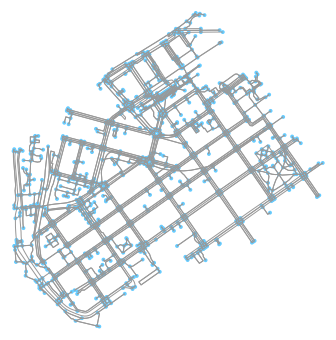

In [2]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains the nodes (blue circles) and the edges (gray lines) that connects those nodes to each other.

It is also possible to retrieve other types of OSM data features with osmnx such as buildings or points of interest (POIs). Let's download the buildings with `OSMnx` [footprints_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.footprints) -function (same as `buildings_from_place` method in OSMnx<0.9) and plot them on top of our street network in Kamppi. Let's also plot the Polygon that represents the area of Kamppi, Helsinki that can be retrieved with `gdf_from_place` -function.

- Retrieve the extent of our location:


In [3]:
area = ox.gdf_from_place(place_name)

- Retrieve buildings from the area:

In [4]:
buildings = ox.footprints_from_place(place_name)

- Check the layers:

In [5]:
print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
print(len(area))
print(len(buildings))

1
427


As a result we got the data as GeoDataFrames. The footprint contains only one object, while the buildings GeoDataFrame contains several polygons.



OSMnx has a nice function called `ox.pois_from_place()` that can be used in a similar manner as the previous function to retrieve specific POI data from OpenStreetMap such as `restaurants`. With parameter `amenities` we can pass a list of OSM amenity categories that we are interested in retrieving. 

- Let's also retrieve restaurants that are located on the area:

In [7]:
# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have?
len(restaurants)

211

As we can see, there are quite many restaurants in the area.

- Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [8]:
# Available columns
restaurants.columns

Index(['osmid', 'geometry', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'amenity', 'cuisine', 'name', 'phone',
       'website', 'wheelchair', 'element_type', 'toilets:wheelchair',
       'created_by', 'outdoor_seating', 'fixme', 'opening_hours', 'email',
       'internet_access', 'internet_access:fee', 'opening_hours:brunch',
       'diet:vegetarian', 'name:fi', 'name:zh', 'short_name', 'takeaway',
       'contact:website', 'diet:vegan', 'name:ru', 'operator', 'smoking',
       'wheelchair:description', 'level', 'contact:phone', 'source', 'name:en',
       'building', 'addr:housename', 'note', 'address', 'brunch',
       'contact:foursquare', 'contact:yelp', 'ref:vatin', 'delivery', 'url',
       'lunch:menu', 'reservation', 'room', 'toilets', 'capacity',
       'access:dog', 'shop', 'opening_hours:lunch_buffet', 'is_in', 'wikidata',
       'alt_name', 'contact:email', 'established', 'description', 'name:sv',
       'lunch', 'description:en'

Wow, there is quite a lot of information related to the POIs. One of the useful ones might be for example the `name`, `address information` and `opening_hours` information:

In [9]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']
# Print only selected cols
restaurants[cols].head(10)

,name,opening_hours,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street
60062502,Kabuki,NaN,Helsinki,FI,12,00180,Lapinlahdenkatu
60133792,Ateljé Finne,NaN,Helsinki,FI,NaN,NaN,NaN
62965963,Empire Plaza,NaN,NaN,NaN,NaN,NaN,NaN
62967659,Ravintola Pääposti,NaN,Helsinki,NaN,1 B,00100,Mannerheiminaukio
68734026,Hampton Bay,NaN,Helsinki,FI,6,00120,Hietalahdenranta
76617692,Johan Ludvig,NaN,Helsinki,FI,NaN,NaN,NaN
76624339,Ravintola Rivoletto,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...,Helsinki,FI,38,00120,Albertinkatu
76624351,Pueblo,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
76627823,Atabar,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
77642757,Southpark,Mo-Sa 11:00-15:00; Su 10:30-17:00,Helsinki,NaN,40,00120,"Sinebrychoffin puisto, Bulevardi"


As we can see, there exists a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data! :)

We can now plot all these different OSM layers by using the familiar `plot()` function of Geopandas. As you might remember, the street network data was not in GeoDataFrame format (it was `networkx.MultiDiGraph`). Luckily, osmnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

- Let's extract the nodes and edges from the graph as GeoDataFrames:

In [10]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [11]:
nodes.head()

,y,x,osmid,highway,ref,geometry
3216400385,60.167552,24.934005,3216400385,turning_circle,NaN,POINT (24.93400 60.16755)
1372233731,60.162290,24.929274,1372233731,crossing,NaN,POINT (24.92927 60.16229)
319885318,60.165072,24.925487,319885318,NaN,NaN,POINT (24.92549 60.16507)
1005744134,60.161622,24.924423,1005744134,NaN,NaN,POINT (24.92442 60.16162)
3216400394,60.167662,24.933920,3216400394,NaN,NaN,POINT (24.93392 60.16766)


In [12]:
edges.head()

,u,v,key,osmid,name,highway,maxspeed,oneway,length,geometry,lanes,service,tunnel,junction,access,bridge,ref
0,3216400385,301360890,0,15240373,Kansakoulukuja,residential,30,False,13.177,"LINESTRING (24.93400 60.16755, 24.93393 60.167...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1372233731,298367080,0,86533507,NaN,footway,NaN,False,6.925,"LINESTRING (24.92927 60.16229, 24.92917 60.16225)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1372233731,292859610,0,15103120,NaN,primary_link,30,True,33.874,"LINESTRING (24.92927 60.16229, 24.92930 60.162...",2,NaN,NaN,NaN,NaN,NaN,NaN
3,1372233731,4430643601,0,"[154412960, 86533507]",NaN,footway,NaN,False,12.489,"LINESTRING (24.92927 60.16229, 24.92941 60.162...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1372233731,311043714,0,86533509,Hietalahdenkatu,primary,30,True,38.768,"LINESTRING (24.92927 60.16229, 24.92938 60.162...",2,NaN,NaN,NaN,NaN,NaN,NaN


Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

<div class="alert alert-info">

**Note**

There are also other ways of retrieving the data from OpenStreetMap with osmnx such as passing a Polygon to extract the data from that area, or passing Point coordinates and retrieving data around that location with specific radius. Take a look of this [tutorial to find out how to use those features of osmnx](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb).


</div>

- Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

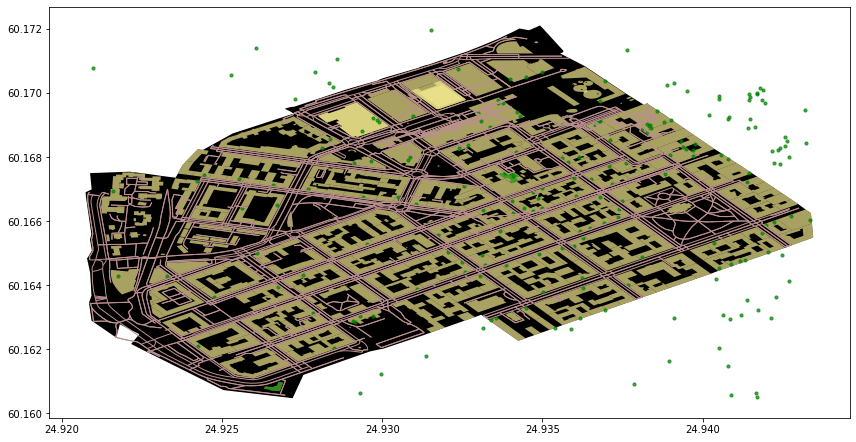

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'Kamppi' in Helsinki. And all of this required only a few lines of code. Pretty neat! 


- As a final step, we might want to re-project the layers to a local projection for plotting:

In [14]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)

- Create a new plot with the re-projected layers:

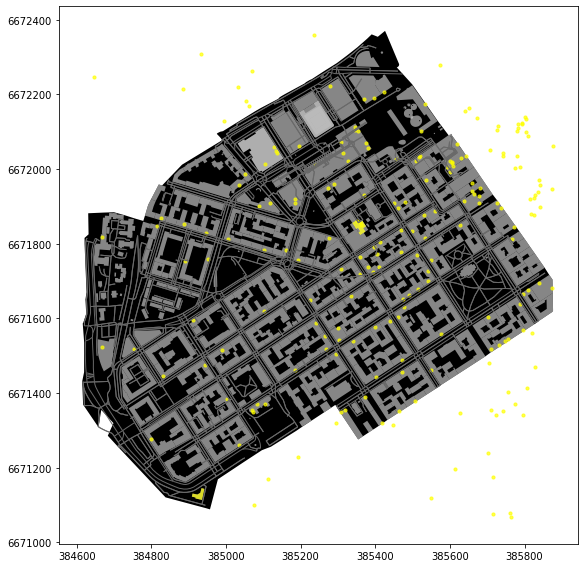

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()